In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content/gdrive/MyDrive/Colab Notebooks/kaggle/'

In [ ]:
cd /content/gdrive/MyDrive/Colab Notebooks/kaggle/Image Colorization

/content/gdrive/MyDrive/Colab Notebooks/kaggle/Image Colorization


In [ ]:
#!kaggle datasets download -d theblackmamba31/landscape-image-colorization

 96% 185M/192M [00:02<00:00, 75.8MB/s]
100% 192M/192M [00:02<00:00, 76.0MB/s]


In [ ]:
#!unzip landscape-image-colorization.zip

# Imports

In [ ]:
import tensorflow as tf
from keras.layers import *
from keras.models import *
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imsave
from skimage.color import rgb2lab, lab2rgb, rgb2gray
from skimage.transform import resize
%matplotlib inline
import os

# Sample Image

(150, 150, 3)


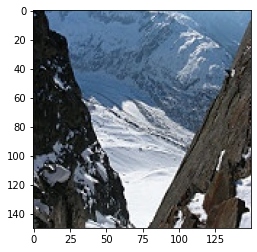

In [ ]:
img = cv2.imread('landscape Images/color/10.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print(img.shape)
plt.imshow(img)

In [ ]:
ls 'landscape Images/color/' | wc -l

7129


# Loading Images
<p> 7000 images for training <br> 129 images for testing

In [ ]:
X = []
Y = []
cnt = 0
train_filenames = os.listdir('landscape Images/color/')[:7000]
test_filenames = os.listdir('landscape Images/color/')[7000:]
for fname in train_filenames:
  img = cv2.imread(f'landscape Images/color/{fname}')
  img = cv2.resize(img, (150, 150))
  img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  img_gray = rgb2gray(img_rgb)
  X.append(img_gray)
  Y.append(img_rgb)
  if (cnt + 1) % 1000 == 0:
    print(f'{cnt + 1} images loaded')
  cnt += 1

1000 images loaded
2000 images loaded
3000 images loaded
4000 images loaded
5000 images loaded
6000 images loaded
7000 images loaded


In [ ]:
X = np.array(X, dtype=float)
X.shape

(7000, 150, 150)

In [ ]:
Y = np.array(Y, dtype=float)
Y.shape

(7000, 150, 150, 3)

In [ ]:
Y = Y / 255.

In [ ]:
X = X.reshape(X.shape+(1,))
X.shape

(7000, 150, 150, 1)

# Autoencoder

In [ ]:
model = Sequential()
model.add(Conv2D(32, input_shape=(150, 150, 1), kernel_size=(4, 4), activation='relu'))
model.add(Conv2D(32, kernel_size=(4, 4), activation='relu', kernel_regularizer='l2'))
model.add(Dropout(0.3))
model.add(Conv2D(64, kernel_size=(4, 4), activation='relu'))
model.add(Dropout(0.3))
model.add(Conv2D(128, kernel_size=(4, 4), activation='relu', kernel_regularizer='l2'))
model.add(Dropout(0.3))
model.add(Conv2D(256, kernel_size=(4, 4), activation='relu'))
model.add(Dropout(0.3))
model.add(Conv2DTranspose(128, kernel_size=(4, 4), activation='relu', kernel_regularizer='l2'))
model.add(Dropout(0.3))
model.add(Conv2DTranspose(64, kernel_size=(4, 4), activation='relu'))
model.add(Dropout(0.3))
model.add(Conv2DTranspose(32, kernel_size=(4, 4), activation='relu', kernel_regularizer='l2'))
model.add(Conv2DTranspose(32, kernel_size=(4, 4), activation='relu'))
model.add(Dropout(0.3))
model.add(Conv2DTranspose(3, kernel_size=(4, 4), activation='relu', kernel_regularizer='l2'))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 147, 147, 32)      544       
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 144, 144, 32)      16416     
_________________________________________________________________
dropout_14 (Dropout)         (None, 144, 144, 32)      0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 141, 141, 64)      32832     
_________________________________________________________________
dropout_15 (Dropout)         (None, 141, 141, 64)      0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 138, 138, 128)     131200    
_________________________________________________________________
dropout_16 (Dropout)         (None, 138, 138, 128)    

In [ ]:
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

In [ ]:
hist = model.fit(X, Y, validation_split=0.1, epochs=30, batch_size=70)

Epoch 1/30
90/90 [==============================] - 228s 2s/step - loss: 2.5465 - accuracy: 0.3413 - val_loss: 1.0124 - val_accuracy: 0.3554
Epoch 2/30
90/90 [==============================] - 181s 2s/step - loss: 0.9058 - accuracy: 0.3322 - val_loss: 0.6431 - val_accuracy: 0.4071
Epoch 3/30
90/90 [==============================] - 182s 2s/step - loss: 0.5912 - accuracy: 0.3446 - val_loss: 0.4479 - val_accuracy: 0.4361
Epoch 4/30
90/90 [==============================] - 181s 2s/step - loss: 0.4160 - accuracy: 0.3569 - val_loss: 0.3287 - val_accuracy: 0.2508
Epoch 5/30
90/90 [==============================] - 181s 2s/step - loss: 0.3086 - accuracy: 0.3473 - val_loss: 0.2495 - val_accuracy: 0.2732
Epoch 6/30
90/90 [==============================] - 181s 2s/step - loss: 0.2351 - accuracy: 0.3549 - val_loss: 0.2017 - val_accuracy: 0.3232
Epoch 7/30
90/90 [==============================] - 182s 2s/step - loss: 0.1875 - accuracy: 0.3611 - val_loss: 0.1609 - val_accuracy: 0.3832
Epoch 8/30
90

In [ ]:
model.save('model_14_06.h5')

In [ ]:
X = []
Y = []

In [ ]:
len(test_filenames)

129

In [ ]:
ls

 data/                model_14_06.h5       model_updated.h5
'landscape Images'/   model.h5             test/
 model_13_06.h5       model_updated_1.h5   Untitled0.ipynb


In [ ]:
mkdir results

In [ ]:
ls

 data/                model_14_06.h5       model_updated.h5   Untitled0.ipynb
'landscape Images'/   model.h5             results/
 model_13_06.h5       model_updated_1.h5   test/


# Model testing

In [ ]:
X_test = []
Y_test = []
for fname in test_filenames:
  img = cv2.imread(f'landscape Images/color/{fname}')
  img = cv2.resize(img, (150, 150))
  img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  img_gray = rgb2gray(img_rgb)
  X_test.append(img_gray)
  Y_test.append(img_rgb)
print("----")

----


In [ ]:
X_test = np.array(X_test)
Y_test = np.array(Y_test)
X_test.shape, Y_test.shape

((129, 150, 150), (129, 150, 150, 3))

In [ ]:
X_test = np.expand_dims(X_test, 3)
X_test.shape

(129, 150, 150, 1)

In [ ]:
Y_test = Y_test / 255.

In [ ]:
model.evaluate(X_test, Y_test)

5/5 [==============================] - 5s 243ms/step - loss: 0.0208 - accuracy: 0.4839


[0.020822152495384216, 0.4839221239089966]

In [ ]:
outputs = model.predict(X_test)
outputs.shape

(129, 150, 150, 3)

# Saving output images

In [ ]:
for i in range(outputs.shape[0]):
  fig = plt.figure(figsize=(10, 10))
  res = outputs[i]
  res = np.maximum(res, 0)
  res = (res * 255).astype(np.uint8)
  ax = plt.subplot(1, 2, 1)
  ax.set_title('Colorized Image')
  plt.axis('off')
  plt.imshow(res)

  og = Y_test[i]
  ax1 = plt.subplot(1, 2, 2)
  ax1.set_title("Original Image")
  plt.axis('off')
  plt.imshow(og)
  plt.tight_layout()
  fig.savefig(f'results/image_{i+1}.jpg')
  plt.close()